# Cross Validation

### What Is Cross-Validation?
- cross-validation is a technique used to assess how well your model generalizes to unseen data by splirring the dataset into multiple train-test sets.
- It ensures that the evolution metrics are not dependent on a specific train-test split.
- We use it to get the accuracy of the model based on the data before building the model.
- It is a technique for validating the model efficiency by training it on the subset of input data and testing on previously unseen subset of input data.

Note: here we are basically training the parameters of the model with features(data) to check the range of accuracy based on data split and then will use that data to get the best results.

Imagine you made a model and you want to test how well it works…

🔥 Problem:
If you test it on just one chunk of data, what if that chunk is too easy or too hard?

✅ Solution:
Split the data into multiple pieces and test on each one — so you get a more fair & reliable score.

This is called Cross-Validation. 🧠

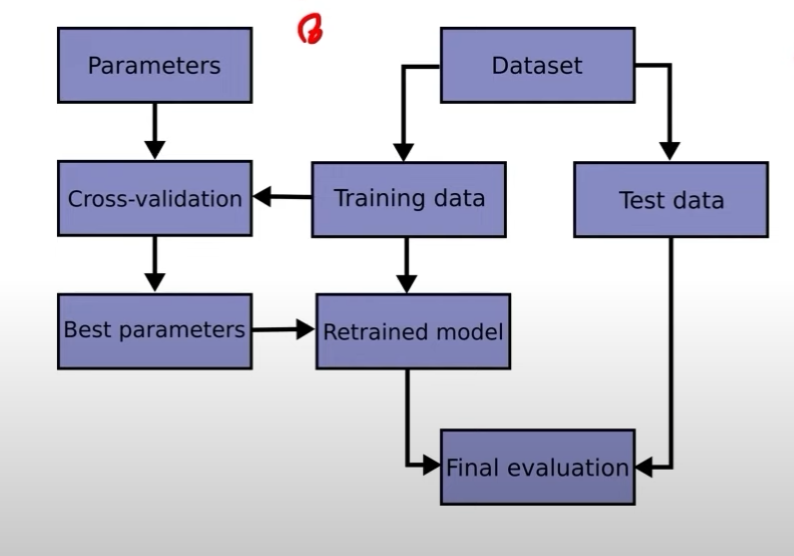

Goal:
- Validate model performance fairly
- Prevent overfitting or underfitting
- Improve robustness of your model

#### Why Not Just One Train/Test Split?

| Issue with Single Split          | Cross-Validation Fixes It     |
| -------------------------------- | ----------------------------- |
| Might be **lucky/unlucky** split | Uses **multiple splits**      |
| Metrics **depend on split**      | Averages results across folds |
| Might **overfit** to validation  | Reduces overfitting risk      |


## Types of Cross-Validation

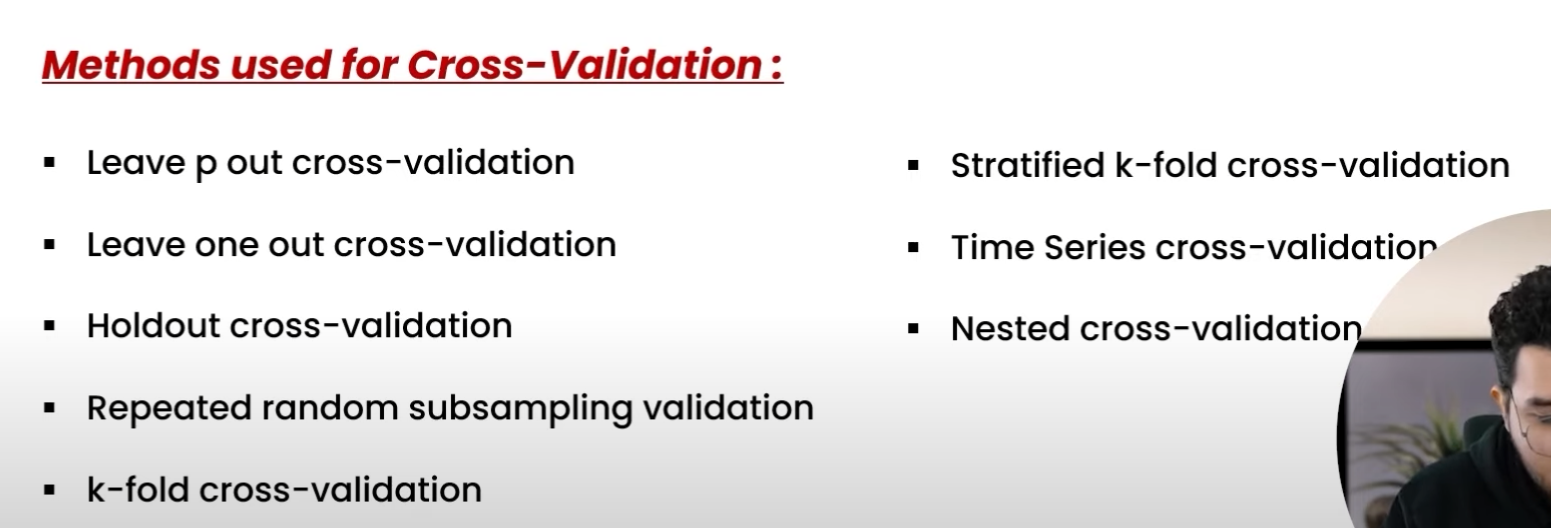

##### A) K-Fold Cross Validation (Most Common)
- Dataset is split into K equal-sized folds.
- Model is trained on K-1 folds, tested on the remaining 1.
- This process repeats K times, and the results are averaged.
- The original dataset is equally partitioned into k subparts ir folds. Out of the k-folds or groups, for each iteration, one group us selected as validation data, and the remaining(k-1) groups are selected as training data. Not suitable for an imbalanced dataset.
```
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression

kf = KFold(n_splits=5)
model = LogisticRegression()
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

print("Accuracy scores for each fold:", scores)
print("Mean accuracy:", scores.mean())
```

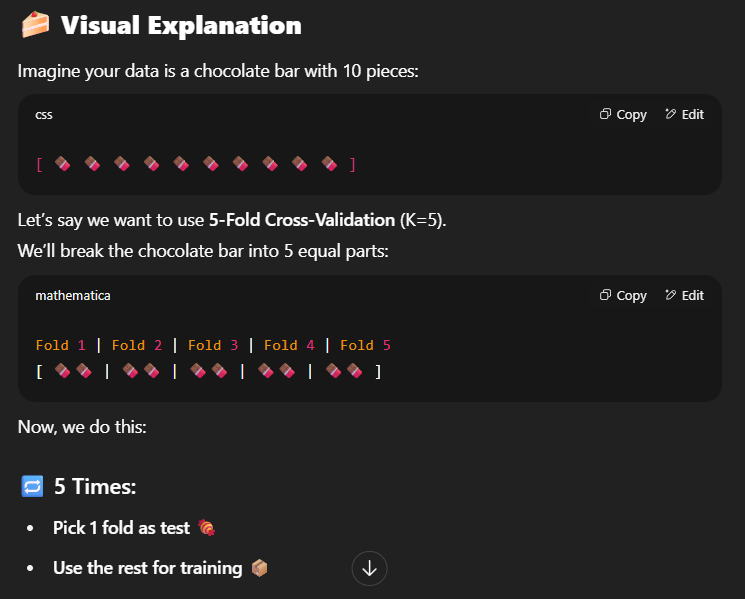
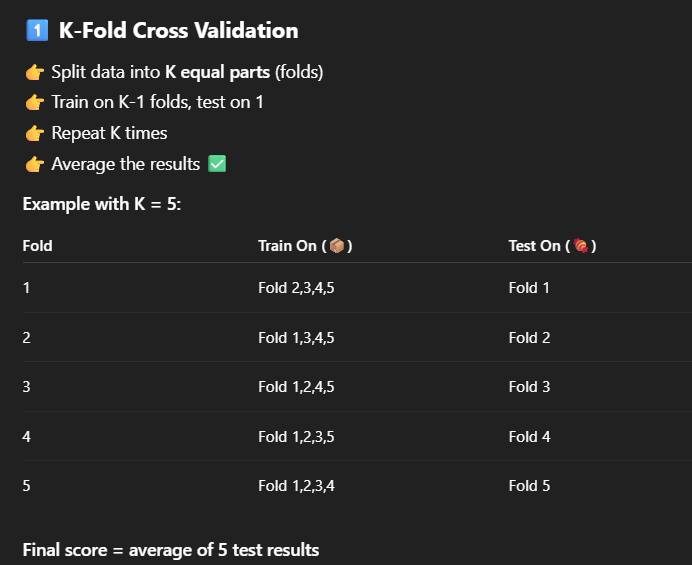

##### B) Stratified K-Fold CV
- Same as K-Fold, but keeps class distribution balanced in each fold.
- Best for classification, especially imbalanced datasets.

```
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)
```
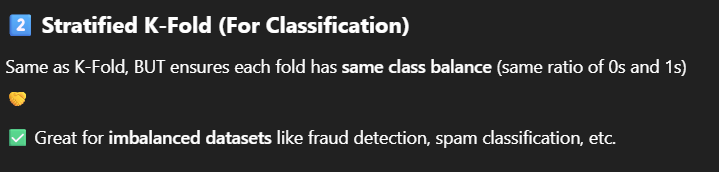
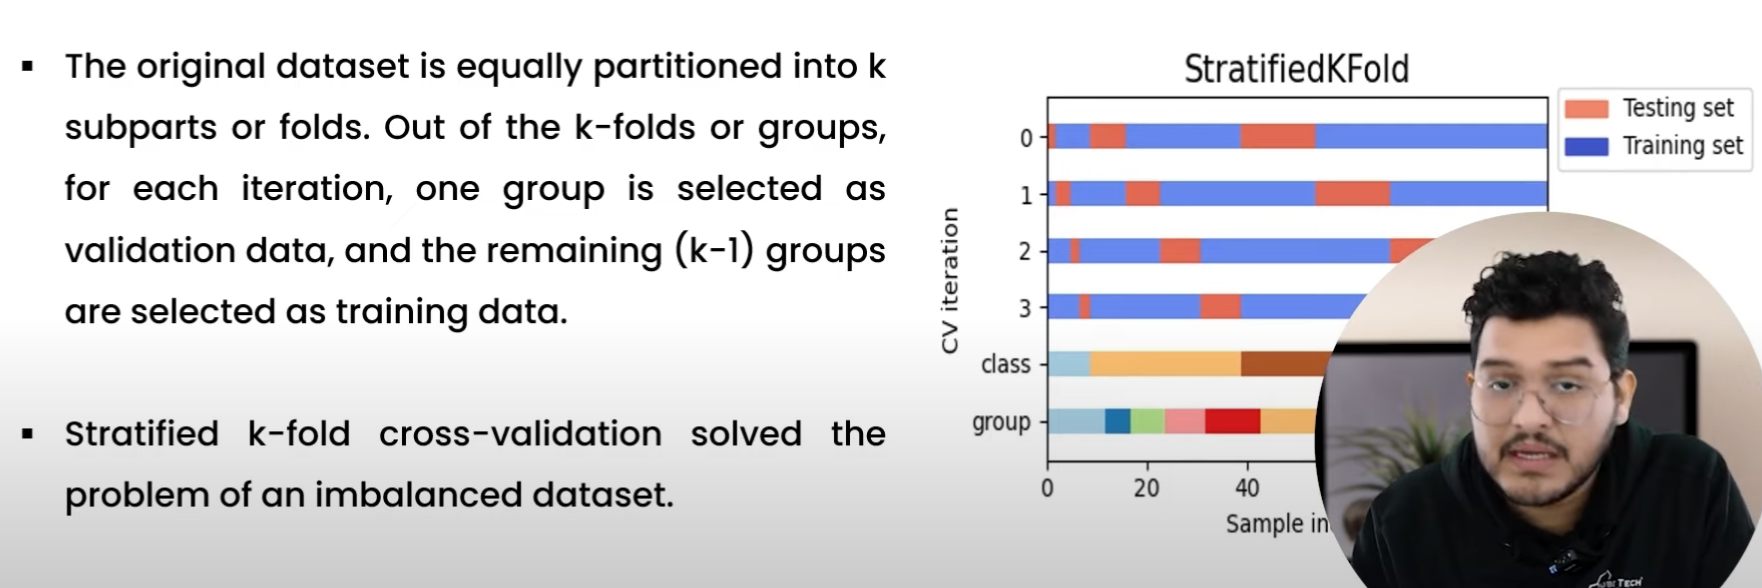

##### C) Leave-One-Out (LOOCV)
- Each data point becomes a test set once
- Useful when dataset is very small
- For n samples, model is trained n times
- it is a exhaustive cross validation technique. It is a category of Lp OCV with the dace of p=1.

```
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
```

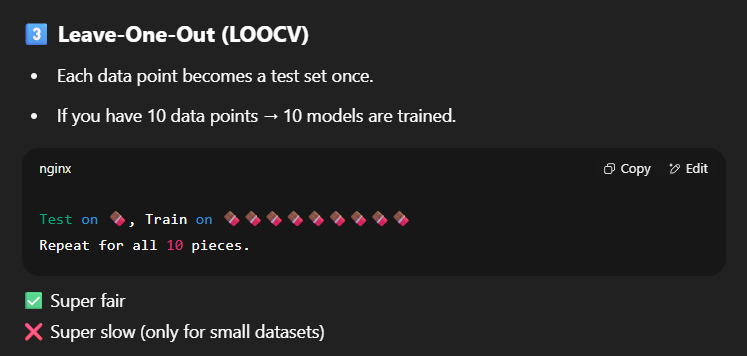
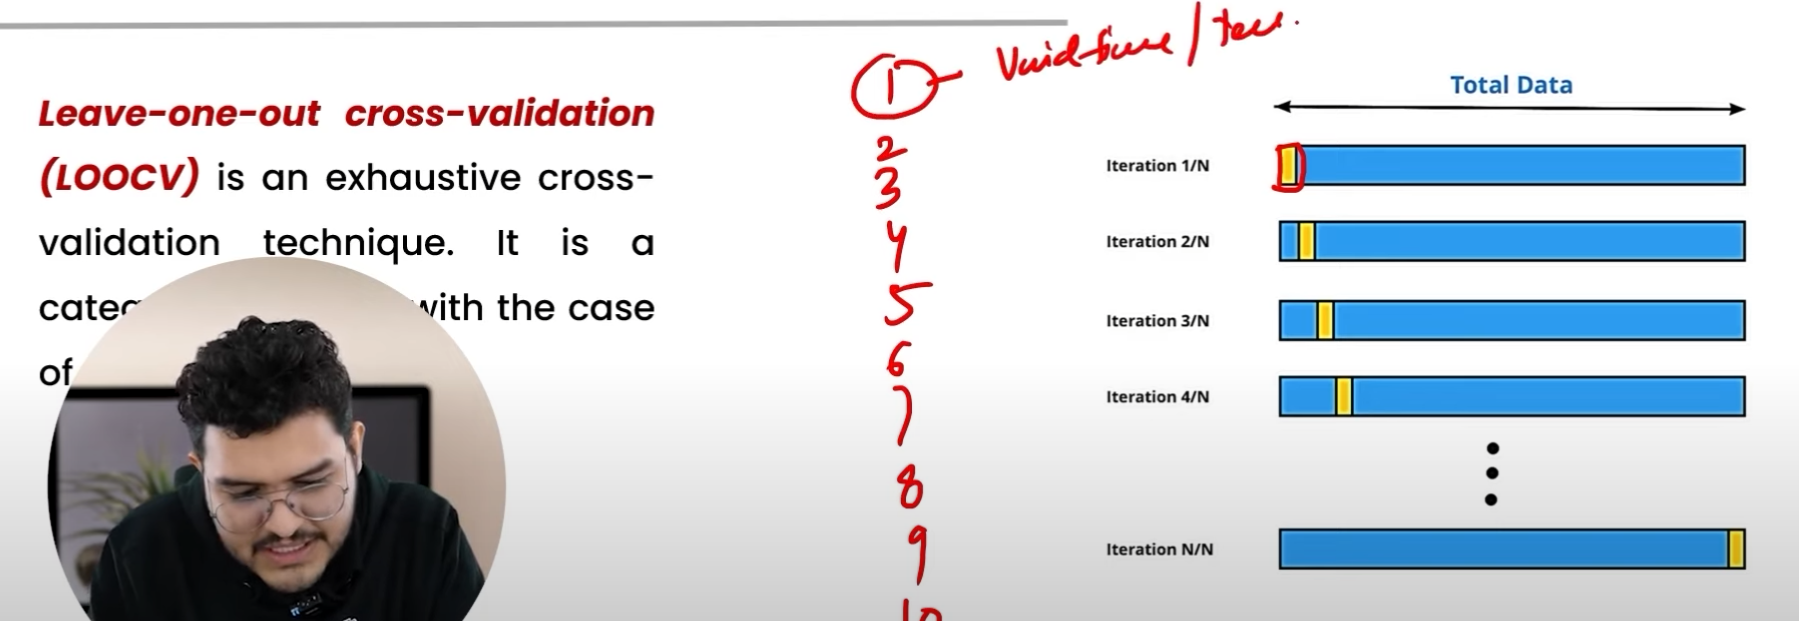



##### D) Repeated K-Fold
- Repeats K-Fold CV multiple times with different splits
- Helps improve reliability of score
```
from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits=5, n_repeats=10)
```

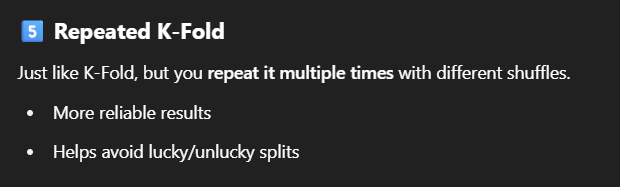



#####  E) Time Series Split
- Used for time series data, where order matters
- Does not shuffle data
- Splits train/test in chronological order

```
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
```

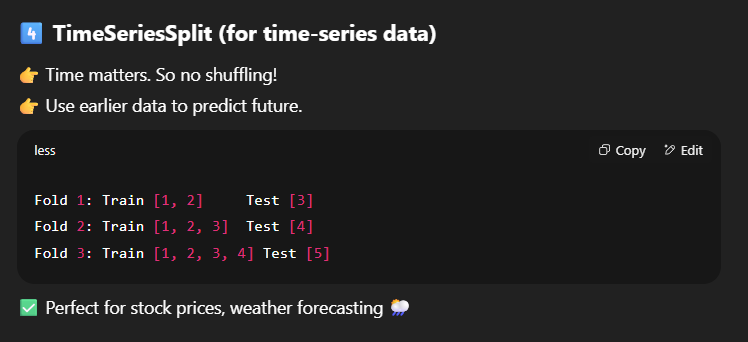



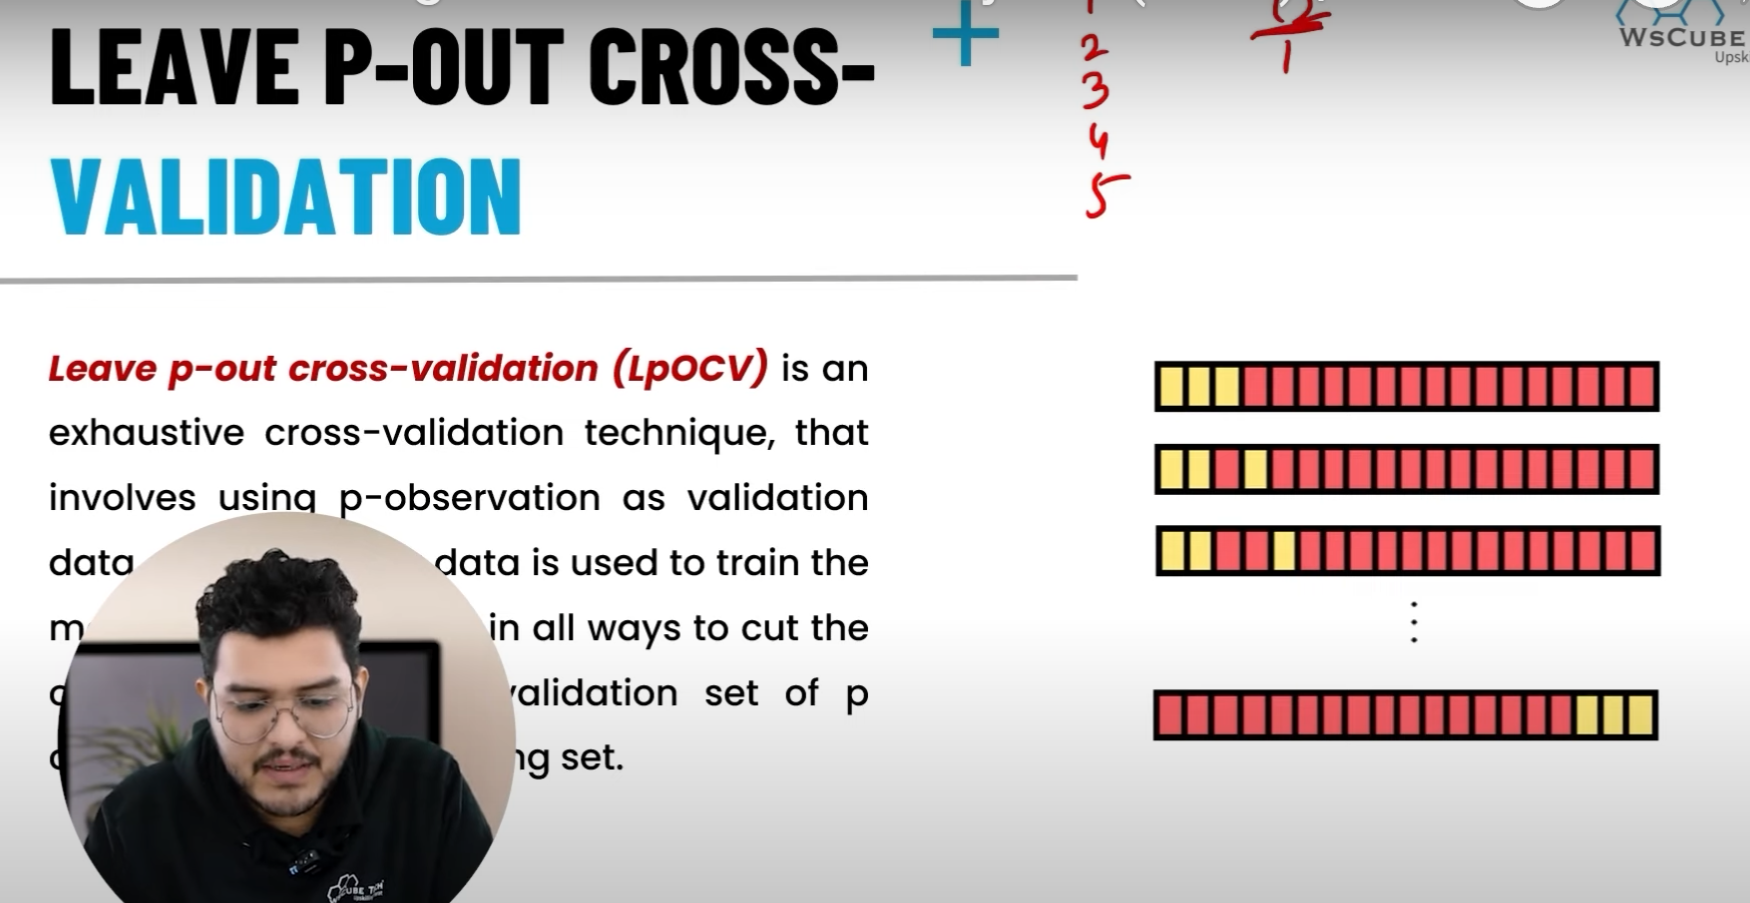

| Type              | Best For               | Splits | Shuffles? | Pros                 | Cons                  |
| ----------------- | ---------------------- | ------ | --------- | -------------------- | --------------------- |
| K-Fold            | General use            | K      | Yes       | Balanced, flexible   | May unbalance classes |
| Stratified K-Fold | Classification         | K      | Yes       | Keeps class ratio    | Slightly slower       |
| LOOCV             | Very small datasets    | n      | No        | Very accurate        | Very slow             |
| TimeSeriesSplit   | Time series            | K      | No        | Keeps time order     | Less training data    |
| Repeated K-Fold   | High robustness needed | K×N    | Yes       | Very reliable scores | More time             |


# Implementation

In [16]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, LeaveOneOut, LeavePOut, KFold, StratifiedKFold, cross_val_score
from sklearn.linear_model import LinearRegression

In [2]:
ds = pd.read_csv('placement file.csv')
ds.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [3]:
x = ds.drop(columns=['package'])
y = ds['package']

In [7]:
new_ds = ds.head(20)
x_new = new_ds.drop(columns=['package'])
y_new = new_ds['package']

In [20]:
score1 = cross_val_score(LinearRegression(), x, y, cv= 5)*100 # here we can give direct npumbers to cv which will allow it to run that number of times on data randomly but i can also give the types of cross validators to split the data.

In [21]:
score1.sort()
score1

array([70.88712673, 75.39804264, 75.68383749, 78.0867752 , 79.05176315])

In [22]:
score2 = cross_val_score(LinearRegression(), x, y, cv= KFold(n_splits= 10))*100

In [23]:
score2.sort()
score2

array([60.48000765, 65.67540106, 67.20523867, 69.890411  , 73.50599138,
       74.37616704, 80.3181025 , 82.0986355 , 82.64799643, 83.96333567])

In [9]:
LOO = LeaveOneOut()  # here it splited the data into 20 parts where each time one test data is used and its always seperated
for train, test in LOO.split(x_new, y_new):
    print(train, test)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [0]
[ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [1]
[ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [2]
[ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [3]
[ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [4]
[ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [5]
[ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19] [6]
[ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 16 17 18 19] [7]
[ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19] [8]
[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19] [9]
[ 0  1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 19] [10]
[ 0  1  2  3  4  5  6  7  8  9 10 12 13 14 15 16 17 18 19] [11]
[ 0  1  2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19] [12]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19] [13]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19] [14]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 1

In [11]:
LPO = LeavePOut(p=2)
for train, test in LPO.split(x_new, y_new):
    print(train, test)

[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [0 1]
[ 1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [0 2]
[ 1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [0 3]
[ 1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [0 4]
[ 1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [0 5]
[ 1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19] [0 6]
[ 1  2  3  4  5  6  8  9 10 11 12 13 14 15 16 17 18 19] [0 7]
[ 1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19] [0 8]
[ 1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19] [0 9]
[ 1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 19] [ 0 10]
[ 1  2  3  4  5  6  7  8  9 10 12 13 14 15 16 17 18 19] [ 0 11]
[ 1  2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19] [ 0 12]
[ 1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19] [ 0 13]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19] [ 0 14]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19] [ 0 15]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 18 19] [ 

In [13]:
KF = KFold(n_splits= 10)
for train, test in KF.split(x_new, y_new):
    print(train, test)

[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [0 1]
[ 0  1  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [2 3]
[ 0  1  2  3  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [4 5]
[ 0  1  2  3  4  5  8  9 10 11 12 13 14 15 16 17 18 19] [6 7]
[ 0  1  2  3  4  5  6  7 10 11 12 13 14 15 16 17 18 19] [8 9]
[ 0  1  2  3  4  5  6  7  8  9 12 13 14 15 16 17 18 19] [10 11]
[ 0  1  2  3  4  5  6  7  8  9 10 11 14 15 16 17 18 19] [12 13]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 16 17 18 19] [14 15]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 18 19] [16 17]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17] [18 19]


In [ ]:
SKF = StratifiedKFold(n_splits= 10)  # it works only on classification data it does not work on regression and linear data.
for train, test in SKF.split(x_new, y_new):
    print(train, test)

ValueError: Supported target types are: ('binary', 'multiclass'). Got 'continuous' instead.